# Lista de Exercícios 2: Amostragem de sinais

- Slide Aula 2: https://marofe.github.io/controle-digital/2024/aula2.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. O objetivo desta prática é simular a discretização de um sinal contínuo com diferentes períodos de amostragem. Para isso, considere o sinal:

\[ y(t) = 1 + \cos(\omega_n t) + \sin(2\omega_n t), \text{ onde } \omega_n = 10\pi \]

**Passos:**

1. **Plotagem do sinal:**  
   Mostre o sinal \( y(t) \) para o intervalo \( t = [0, 2] \) usando um gráfico.

2. **Espectro de frequência:**  
   Obtenha o espectro de frequência de \( y(t) \) utilizando a Transformada de Fourier (FFT). Qual é a frequência máxima do sinal?  
   *(Dica: Consulte a documentação da função `fft` para mais detalhes.)*

**Exemplo de código em MATLAB:**

```matlab
n = numel(y); % Obtém o tamanho do vetor sinal
Y = fft(y); % Calcula a FFT (Transformada de Fourier bilateral)
Y = abs(fftshift(Y) / n); % Obtém a magnitude da FFT
f = fa / n * (-floor(n/2):floor(n/2)); % Vetor de frequências
figure; % Cria uma nova figura
plot(f, Y); % Plota o espectro de y
```


In [3]:
# Definindo os parâmetros
omega_n = 10 * np.pi
t = np.linspace(0, 2, 1000)  # Vetor de tempo de 0 a 2 segundos

# Definindo o sinal y(t)
y_t = 1 + np.cos(omega_n * t) + np.sin(2 * omega_n * t)

# Calculando a FFT
n = len(y_t)
Y = np.fft.fft(y_t)  # FFT de y(t)
Y = np.fft.fftshift(Y)  # Shift da FFT para centralizar no zero
Y_magnitude = np.abs(Y) / n  # Magnitude da FFT normalizada

# Definindo o vetor de frequências
fa = 1 / (t[1] - t[0])  # Frequência de amostragem
f = fa * np.fft.fftfreq(n, d=(t[1] - t[0]))
f = np.fft.fftshift(f)  # Shift das frequências

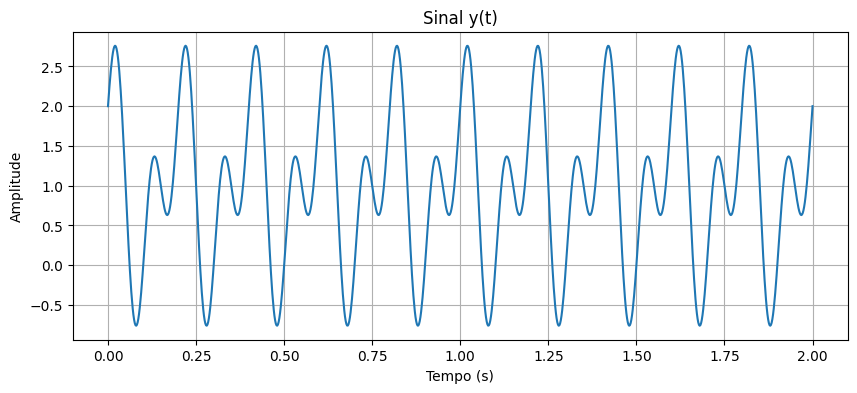

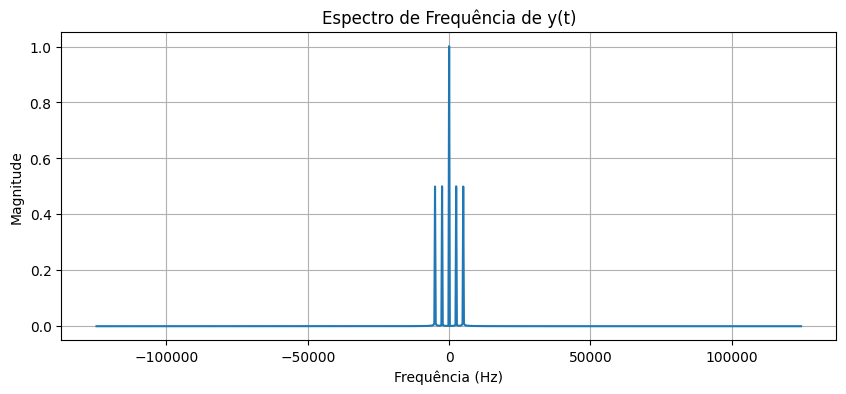

In [4]:
# Plotando o sinal y(t)
plt.figure(figsize=(10, 4))
plt.plot(t, y_t)
plt.title('Sinal y(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando o espectro de frequência
plt.figure(figsize=(10, 4))
plt.plot(f, Y_magnitude)
plt.title('Espectro de Frequência de y(t)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()